# Second Order System 

## Frequency Response
This demo models the frequency response $H(f)$ of a second order system.
The system is fully described by two parameters, the resonance frequency $f_0$ and the demping ratio $\zeta$.

The system is *underdamped* if the damping ratio $\zeta < 1$ and *overdamped* if $\zeta > 1$. The situation where $\zeta = 1$ is called *critically damped*.

The frequency response $H(f)$ of a second order system is a complex-valued function given by
\begin{align}
    H(f) &= \frac{1}{1 - \left( \frac{f}{f_0} \right)^2 + 2j\zeta \frac{f}{f_0} }
\end{align}
The magnitude $|H|$ and phase $\angle H$ are plotted in separate graphs. It is common to use a logarithmic frequency axis and show the magnitude in decibels.



In [17]:
import numpy as np
from math import pi, sqrt
import matplotlib.pyplot as plt

# Allow interactive figures in Matplotlig
%matplotlib ipympl

class FrequencyResponse():
    """Demonstation of second order system frequency response.

    All calculations and plotting routines are contained in this class
    """

    def __init__(self, f0=1, zeta=0.7):
        """Initialise system parameters."""
        self.f0 = f0         # Resonance frequency
        self.zeta = zeta     # Damping ratio
        self.n_f = 300        # Number of points in frequency vectors
        self.flim = [-1.5, 1.5]   # Frequency limits, logarithmic
        self.ax_magnitude, self.ax_phase = self.initialise_graphs()

    def initialise_graphs(self):
        """Initialise result graph ."""
        plt.close("all")
        plt.rc('font', size=10)          # Default text sizes
        fig = plt.figure(figsize=[10, 7],
                         constrained_layout=True,
                         num="Second Order System - Frequency Response")
        ax_magnitude = fig.add_subplot(2, 1, 1)   # Graph (axes) for magnitude plot
        ax_phase = fig.add_subplot(2, 1, 2)       # Graph (axes) for phase plot

        # Scale and label axes
        for ax in [ax_magnitude, ax_phase]:    # Common for both plots
            ax.set(xlabel="Frequency [Hz]",
                   xlim=(np.min(self.f()),  np.max(self.f())))
            ax.grid(True, which='major', axis='both')
            ax.grid(True, which='minor', axis='x')

        db_min = -24
        db_max = 20
        ax_magnitude.set(ylabel="Magnitude",
                         ylim=(db_min, db_max),
                         yticks=np.arange(db_min, db_max, 3))

        phi_min = -180
        ax_phase.set(ylabel="Phase [Degrees]",
                     ylim=(phi_min, 0),
                     yticks=np.arange(phi_min, 1, 30))

        return ax_magnitude, ax_phase

    def undercritical(self):
        """Determine whether damping is under- or overcritical."""
        return self.zeta < 1

    def f(self):
        """Create frequency vector."""
        return np.logspace(min(self.flim), max(self.flim), self.n_f)

    def H(self):
        """Calculate frequency response."""
        return 1/(1 - (self.f()/self.f0)**2 + 2j*self.zeta*self.f()/self.f0)

    def plot(self):
        """Plot result in graph."""
        # Remode previous graphs and texts
        for ax in [self.ax_magnitude, self.ax_phase]:
            for art in list(ax.lines):
                art.remove()
            for art in list(ax.texts):
                art.remove()

        # Plot magnitude
        h_db = 20*np.log10(abs(self.H()))
        self.ax_magnitude.semilogx(self.f(), h_db, "-", color="C0")

        # Texts and marker lines on magnitude plot
        indicator_color = "C3"
        self.ax_magnitude.axvline(
            x=self.f0, color=indicator_color, linestyle='-')
        self.ax_magnitude.axhline(y=0, color="black", linestyle='-')
        self.ax_magnitude.axhline(y=-3, color=indicator_color, linestyle='--')
        self.ax_magnitude.axhline(y=3, color=indicator_color, linestyle='--')
        self.ax_magnitude.text(
            self.f0, -20, f" $ f_0$={self.f0:.3g} Hz", color=indicator_color)

        # Plot phase
        self.ax_phase.semilogx(self.f(), np.degrees(np.angle(self.H())), "-", color="C0")

        # Texts and marker lines onphase plot
        self.ax_phase.axvline(x=self.f0, color=indicator_color, linestyle='-')
        self.ax_phase.axhline(y=-90, color=indicator_color, linestyle='--')

        # Notify whether underdamped
        if self.undercritical():
            status = " Undercritical "
            status_colors  = ["white", "C0"]
        else:
            status = " Overcritical " 
            status_colors  = ["black", "C1"]

        # Notify whether underdamped
        self.ax_magnitude.text(5, 12, status, color=status_colors[0], backgroundcolor=status_colors[1])

        return

Label(value='Second Order System Frequency Response', style=LabelStyle(font_weight='bold'))

FloatSlider(value=1.0, description='Resonance Frequency [Hz]', layout=Layout(width='70%'), max=4.0, min=0.1, r…

FloatLogSlider(value=0.6, description='Damping Ratio', layout=Layout(width='70%'), max=1.0, min=-2.0, readout_…

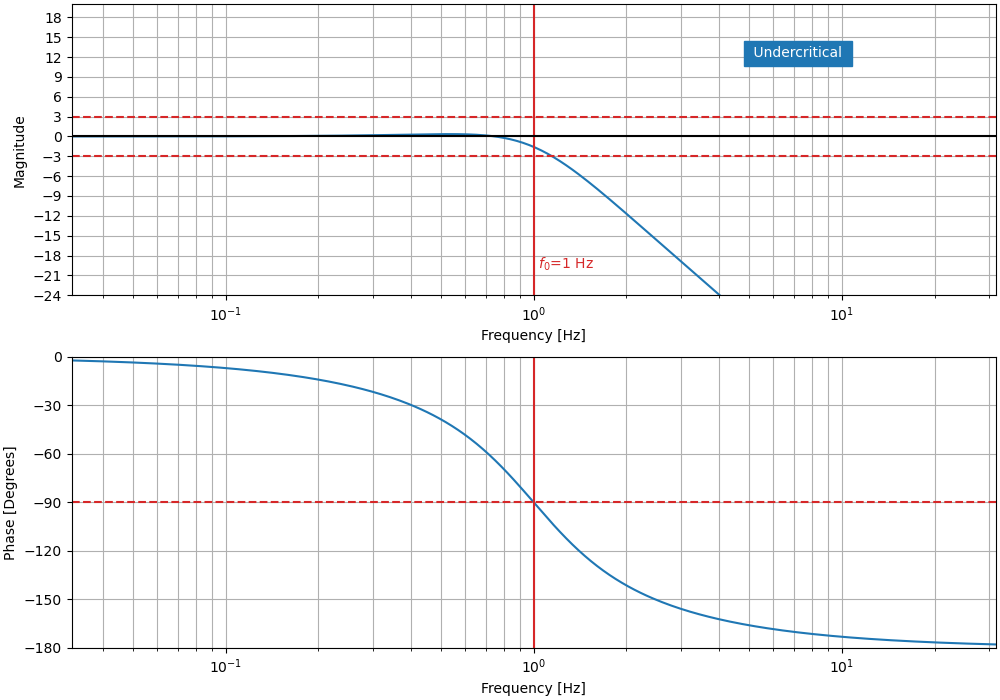

In [25]:
# Load modules for intereactive operation
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_frequencyresponse(f0, zeta):
    """Set values and call plotting function."""
    freq_resp.f0 = f0
    freq_resp.zeta = zeta
    freq_resp.plot()    
    return

# Define widgets to operate program
widget_style = dict(description_width='initial')

title_widget = widgets.Label("Second Order System Frequency Response", 
                             style=dict(font_weight='bold'))

f0_widget = widgets.FloatSlider(min=0.1, max= 4, value=1, step=0.1, 
                                 description='Resonance Frequency [Hz]',  
                                 readout_format='.1f',
                                 layout=widgets.Layout(width='70%'),
                                 style=widget_style)
zeta_widget = widgets.FloatLogSlider(min=-2, max= 1, value=0.60, step=0.01, 
                                 description='Damping Ratio',  
                                 readout_format='.2f',
                                 layout=widgets.Layout(width='70%'),
                                 style=widget_style)

display(title_widget)
display(f0_widget)
display(zeta_widget)

# Define signal and run demo
freq_resp = FrequencyResponse()
w = widgets.interactive(run_frequencyresponse, f0=f0_widget, zeta=zeta_widget)